In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/baileygriswold/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


*** Load Quality Review Data ***

![Alt text](./QR_Ratings.png)

In [3]:
ratings = {'O':5, 'WD': 5, 'P':4, 'D':3, 'UPF': 2, 'U':1, 'UD':1}

In [4]:
df_qr = pd.read_excel('./data/QualityReviewRatings_20052017.xlsx')
df_qr.reset_index(inplace=True)
df_qr.rename(columns=(df_qr.loc[6]), inplace = True)
df_qr = df_qr[7:]
df_qr.drop(['QS1_1', 'QS1_2', 'QS1_3',
       'QS1_4', 'QS1_5', 'QS1_6', 'QS1_7', 'QS2_1', 'QS2_2',
       'QS2_3', 'QS2_4', 'QS2_5', 'QS2_6', 'QS2_7', 'QS3_1',
       'QS3_2', 'QS3_3', 'QS3_4', 'QS3_5', 'QS3_6', 'QS3_7', 'QS3_8',
       'QS4_1', 'QS4_2', 'QS4_3', 'QS4_4', 'QS4_5', 'QS4_6',
       'QS4_7',  'QS5_1', 'QS5_2', 'QS5_3', 'QS5_4', 'QS5_5',
       'QS5_6', 'QS5_7'],axis=1, inplace=True)
df_qr['Year'] = [int('20'+ x[-2:]) for x in df_qr['SchYR']]

In [5]:
df_qr_nu = pd.DataFrame(df_qr.BN.unique())
df_qr_nu.rename(columns={0:'BN'}, inplace=True)

for yr in df_qr['Year'].unique():
    df_qr_nu = pd.merge(df_qr_nu, df_qr[(df_qr['Year'] == yr)][['BN','Overall']], on='BN', how='outer')
    df_qr_nu.rename(columns={'Overall':'Overall'+str(yr)}, inplace=True)

In [6]:
df_qr_nu.head()

,BN,Overall2006,Overall2007,Overall2008,Overall2009,Overall2010,Overall2011,Overall2012,Overall2013,Overall2014,Overall2015,Overall2016,Overall2017
0,M307,P,NaN,WD,NaN,P,NaN,NaN,NaN,P,NaN,NaN,NaN
1,M459,P,DYO,P,NaN,NaN,NaN,P,NaN,NaN,NaN,NaN,NaN
2,M560,WD,DYO,WD,NaN,WD,NaN,NaN,NaN,P,NaN,NaN,NaN
3,M294,WD,DYO,WD,NaN,NaN,NaN,NaN,NaN,P,NaN,NaN,NaN
4,M299,P,NaN,P,UPF,P,NaN,NaN,NaN,P,NaN,NaN,NaN


In [7]:
df_qr_nu['Avg_rating'] = df_qr_nu.replace(ratings).mean(axis=1)

*** Load in School Quality Review Reports *** 

In [8]:
df_sqr = pd.read_excel('./data/2016_2017_EMS_SQR_Results.xlsx')
df_sqr['BN'] = [x[2:6] for x in df_sqr.DBN]
df_sqr.head()

,DBN,School Name,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,Strong Family-Community Ties Rating,Trust Rating,...,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate,BN
0,01M015,P.S. 015 Roberto Clemente,Elementary,161,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,...,0.068,0.298,0.584,0.025,6.8,0.625,0.938,0.215,0.982,M015
1,01M019,P.S. 019 Asher Levy,Elementary,247,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,Meeting Target,Meeting Target,...,0.077,0.202,0.664,0.053,7.8,0.805,0.910,0.324,0.972,M019
2,01M020,P.S. 020 Anna Silver,Elementary,499,Not Meeting Target,Approaching Target,Approaching Target,Meeting Target,Approaching Target,Approaching Target,...,0.329,0.098,0.491,0.042,0.8,0.600,0.929,0.256,0.962,M020
3,01M034,P.S. 034 Franklin D. Roosevelt,K-8,337,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,...,0.053,0.297,0.614,0.030,0.7,0.732,0.912,0.305,0.972,M034
4,01M063,The STAR Academy - P.S.63,Elementary,178,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,Meeting Target,Meeting Target,...,0.039,0.191,0.646,0.101,9.9,0.500,0.931,0.251,0.973,M063


In [9]:
list(df_sqr)

['DBN',
 'School Name',
 'School Type',
 'Enrollment',
 'Rigorous Instruction Rating',
 'Collaborative Teachers Rating',
 'Supportive Environment Rating',
 'Effective School Leadership Rating',
 'Strong Family-Community Ties Rating',
 'Trust Rating',
 'Student Achievement Rating',
 'Rigorous Instruction - Percent Positive',
 'Collaborative Teachers - Percent Positive',
 'Supportive Environment - Percent Positive',
 'Effective School Leadership - Percent Positive',
 'Strong Family-Community Ties - Percent Positive',
 'Trust - Percent Positive',
 'Quality Review - How interesting and challenging is the curriculum?',
 'Quality Review - How effective is the teaching and learning?',
 'Quality Review - How well does the school assess what students are learning?',
 'Quality Review - How clearly are high expectations communicated to students and staff?',
 'Quality Review - How well do teachers work with each other?',
 'Quality Review - How safe and inclusive is the school while supporting soci

*** Merge average rating onto QR data ***

In [10]:
inv_rat = {v: k for k, v in ratings.items()}

In [11]:
df_tmp = df_qr_nu[['BN','Avg_rating']].dropna()
df_tmp['Avg_rating'] = [int(x) for x in df_tmp['Avg_rating']]
df_tmp.replace(inv_rat, inplace=True)

df_rat = pd.merge(df_tmp, df_sqr, on='BN', how='inner')

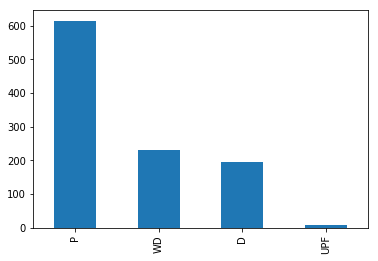

In [12]:
df_rat.Avg_rating.value_counts().plot(kind='bar')

In [13]:
df_rat = df_rat[df_rat.Avg_rating != 'UPF']

In [14]:
df_rat.Avg_rating.value_counts()

P     615
WD    230
D     195
Name: Avg_rating, dtype: int64

In [15]:
df_rat.Avg_rating.value_counts().sum()

1040

In [16]:
tot = df_rat.Avg_rating.value_counts().sum()
p_P = df_rat.Avg_rating.value_counts()[0] / tot 
p_WD = df_rat.Avg_rating.value_counts()[1] / tot 
p_D = df_rat.Avg_rating.value_counts()[2] / tot 

print ('Proficient Prior: ', p_P)
print ('Well Developed Prior: ', p_WD)
print ('Developing Prior: ', p_D)

Proficient Prior:  0.591346153846
Well Developed Prior:  0.221153846154
Developing Prior:  0.1875


'Economic Need Index','Average Incoming ELA Proficiency (Based on 4th Grade)'

In [19]:
wd_eni_mn = df_rat[df_rat.Avg_rating == 'WD']['Economic Need Index'].mean()
wd_eni_sig = df_rat[df_rat.Avg_rating == 'WD']['Economic Need Index'].std()

d_eni_mn = df_rat[df_rat.Avg_rating == 'D']['Economic Need Index'].mean()
d_eni_sig = df_rat[df_rat.Avg_rating == 'D']['Economic Need Index'].std()

p_eni_mn = df_rat[df_rat.Avg_rating == 'P']['Economic Need Index'].mean()
p_eni_sig = df_rat[df_rat.Avg_rating == 'P']['Economic Need Index'].std()

In [20]:
print ('Mean Economic Need, Well Developed schools: ', wd_eni_mn, '+/- ', wd_eni_sig)
print ('Mean Economic Need, Developing schools : ', d_eni_mn, '+/- ', d_eni_sig)
print ('Mean Economic Need, Proficient schools : ', p_eni_mn, '+/- ', p_eni_sig)

Mean Economic Need, Well Developed schools:  0.5436739130434781 +/-  0.24549981584210534
Mean Economic Need, Developing schools :  0.7500102564102562 +/-  0.1741577371810882
Mean Economic Need, Proficient schools :  0.6297430894308941 +/-  0.22246916635944824


In [21]:
wd_ela_mn = df_rat[df_rat.Avg_rating == 'WD']['Average Incoming ELA Proficiency (Based on 4th Grade)'].mean()
wd_ela_sig = df_rat[df_rat.Avg_rating == 'WD']['Average Incoming ELA Proficiency (Based on 4th Grade)'].std()

d_ela_mn = df_rat[df_rat.Avg_rating == 'D']['Average Incoming ELA Proficiency (Based on 4th Grade)'].mean()
d_ela_sig = df_rat[df_rat.Avg_rating == 'D']['Average Incoming ELA Proficiency (Based on 4th Grade)'].std()

p_ela_mn = df_rat[df_rat.Avg_rating == 'P']['Average Incoming ELA Proficiency (Based on 4th Grade)'].mean()
p_ela_sig = df_rat[df_rat.Avg_rating == 'P']['Average Incoming ELA Proficiency (Based on 4th Grade)'].std()

print ('Avg Incoming ELA Proficiency, Well Developed schools: ', wd_ela_mn, '+/- ', wd_ela_sig)
print ('Avg Incoming ELA Proficiency, Developing schools : ', d_ela_mn, '+/- ', d_ela_sig)
print ('Avg Incoming ELA Proficiency, Proficient schools : ', p_ela_mn, '+/- ', p_ela_sig)

Avg Incoming ELA Proficiency, Well Developed schools:  2.9445161290322575 +/-  0.5155601042042188
Avg Incoming ELA Proficiency, Developing schools :  2.5330136986301364 +/-  0.34120979588772254
Avg Incoming ELA Proficiency, Proficient schools :  2.6837142857142853 +/-  0.3964590810609149


In [37]:
#median, mean of the two variables
print ('Median Econ Need Index: ', df_rat['Economic Need Index'].median())
print ('Mean Econ Need Index: ', df_rat['Economic Need Index'].mean())
print ('\n')

print ('Median ELA prof: ', df_rat['Average Incoming ELA Proficiency (Based on 4th Grade)'].median())
print ('Mean ELA prof: ', df_rat['Average Incoming ELA Proficiency (Based on 4th Grade)'].mean())



Median Econ Need Index:  0.685
Mean Econ Need Index:  0.6332586538461537


Median ELA prof:  2.58
Mean ELA prof:  2.700387096774194


In [23]:
eni_x = df_rat['Economic Need Index'].median()
ela_x = df_rat['Average Incoming ELA Proficiency (Based on 4th Grade)'].median()

In [29]:
def nb_prob_dens(x, mew, sig):
    tmp = exp(-(((x-mew)/sig)**2)/2)
    return (tmp / (sig * np.sqrt(2*math.pi)))

In [30]:
print ('WD, Pr(ENI = .685 | C: ', nb_prob_dens(eni_x, wd_eni_mn, wd_eni_sig))
print ('D, Pr(ENI = .685 | C: ', nb_prob_dens(eni_x, d_eni_mn, d_eni_sig))
print ('P, Pr(ENI = .685 | C: ', nb_prob_dens(eni_x, p_eni_mn, p_eni_sig))
print ('\n')
print ('WD, Pr(ELA = 2.58 | C: ', nb_prob_dens(ela_x, wd_ela_mn, wd_ela_sig))
print ('D, Pr(ELA = 2.58 | C: ', nb_prob_dens(ela_x, d_ela_mn, d_ela_sig))
print ('P, Pr(ELA = 2.58 | C: ', nb_prob_dens(ela_x, p_ela_mn, p_ela_sig))

WD, Pr(ENI = .685 | C:  1.37688600523
D, Pr(ENI = .685 | C:  2.1365340983
P, Pr(ENI = .685 | C:  1.73877683648


WD, Pr(ELA = 2.58 | C:  0.602671865235
D, Pr(ELA = 2.58 | C:  1.15816619096
P, Pr(ELA = 2.58 | C:  0.972413883579


In [34]:
up_WD = nb_prob_dens(eni_x, wd_eni_mn, wd_eni_sig) * \
        nb_prob_dens(ela_x, wd_ela_mn, wd_ela_sig) * p_WD
up_D = nb_prob_dens(eni_x, d_eni_mn, d_eni_sig) * \
        nb_prob_dens(ela_x, d_ela_mn, d_ela_sig) * p_D
up_P = nb_prob_dens(eni_x, p_eni_mn, p_eni_sig) * \
        nb_prob_dens(ela_x, p_ela_mn, p_ela_sig) * p_P    


print ('WD, Unnormed Posterior: ', up_WD)
print ('D, Unnormed Posterior: ', up_D)
print ('P, Unnormed Posterior: ', up_P)

WD, Unnormed Posterior:  0.183515774141
D, Unnormed Posterior:  0.463961542216
P, Unnormed Posterior:  0.999854425757


In [36]:
print ('WD, Posterior: ', up_WD / sum([up_WD, up_D, up_P]))
print ('D, Posterior: ', up_D / sum([up_WD, up_D, up_P]))
print ('P, Posterior: ', up_P / sum([up_WD, up_D, up_P]))

WD, Posterior:  0.111401832096
D, Posterior:  0.28164426773
P, Posterior:  0.606953900174


For a school with the median Economic Need Index value and the median ELA proficiency of incoming students, there is only a 11% chance that it is a Well Developed school.  There is a 60% probability that school has a rating of Proficient, and a 28% probability that it is a developing school. 